Step 1: Data Preparation
1. Download ERA5 or GFS FNL NetCDF data (monthly resolution)
2. Suggested variables: u10, sst
3. Clip to Pacific region (lon: 120–280 or -160 to 80; lat: -30 to 30) to make processing faster

In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.geodesic import Geodesic
from shapely.geometry import box
import netCDF4 as nc

In [13]:
file_path = 'FINAL_08.nc'
ds = xr.open_dataset(file_path)

In [5]:
from netCDF4 import Dataset
Dataset(r"C:\Users\alexg\Meteo203-2526-Garibay\exercise_08\FINAL_08.nc")

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2025-12-09T14:57 GRIB to CDM+CF via cfgrib-0.9.15.1/ecCodes-2.42.0 with {"source": "tmp7626_8m_/data.grib", "filter_by_keys": {"stream": ["moda"], "stepType": ["avgua"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): valid_time(1020), latitude(241), longitude(961)
    variables(dimensions): int64 number(), int64 valid_time(valid_time), float64 latitude(latitude), float64 longitude(longitude), <class 'str'> expver(valid_time), float32 u10(valid_time, latitude, longitude), float32 sst(valid_time, latitude, longitude)
    groups: 

In [9]:
ds = Dataset

In [11]:
ds

netCDF4._netCDF4.Dataset

In [7]:
import xarray as xr

xr.open_dataset("C:\\Users\\alexg\\Meteo203-2526-Garibay\\exercise_08\\FINAL_08.nc")

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 1020, latitude: 241, longitude: 961)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2024-12-01
  * latitude    (latitude) float64 2kB 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude   (longitude) float64 8kB -60.0 -59.75 -59.5 ... 179.5 179.8 180.0
    expver      (valid_time) <U4 16kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 945MB ...
    sst         (valid_time, latitude, longitude) float32 945MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-09T14:57 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
sst = ds['sst']

In [15]:
sst

<xarray.DataArray 'sst' (valid_time: 1020, latitude: 241, longitude: 961)> Size: 945MB
[236233020 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2024-12-01
  * latitude    (latitude) float64 2kB 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude   (longitude) float64 8kB -60.0 -59.75 -59.5 ... 179.5 179.8 180.0
    expver      (valid_time) <U4 16kB ...
Attributes: (12/31)
    GRIB_paramId:                             34
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      231601
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_shortName:                           sst
    GRIB_units:                               K
    long_name:                                Sea surface temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

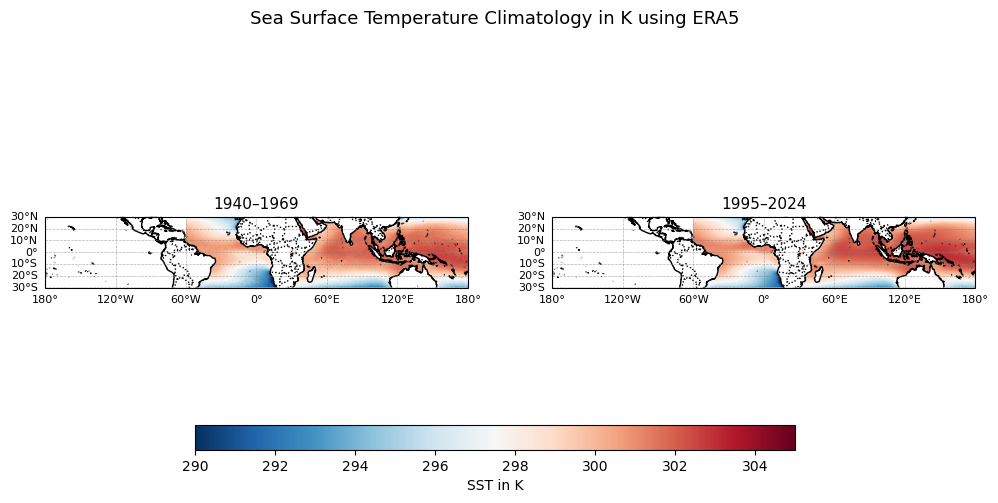

In [25]:
# Comparison of Previous Climate Normal to Latest Climate Normal
sst_clim_1 = sst.sel(valid_time=slice("1940", "1969")).mean(dim="valid_time")
sst_clim_2 = sst.sel(valid_time=slice("1995", "2024")).mean(dim="valid_time")

# Plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axes = plt.subplots(
    1, 2, figsize=(12, 5),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

for ax, data, title in zip(
    axes,
    [sst_clim_1, sst_clim_2],
    ["1940–1969", "1995–2024"]
):

    # ----------------------------------------------------------
    # REMOVE the region 180W → 60W (i.e., longitudes -180 → -60)
    # KEEP only longitudes east of -60 (60W)
    # ----------------------------------------------------------
    data = data.where(data.longitude > -60)

    # Mask remaining NaN areas
    data = data.where(data.notnull())

    pcm = data.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="RdBu_r",
        vmin=290, vmax=305,
        add_colorbar=False
    )
    
    ax.coastlines(resolution="50m")
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.set_title(title, fontsize=11)

    # ---- Latitude & Longitude Labels ----
    gl = ax.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=0.5,
        color='gray',
        alpha=0.6,
        linestyle='--'
    )
    gl.top_labels   = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

# ---- Shared colorbar ----
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.05])
fig.colorbar(pcm, cax=cbar_ax,
             orientation="horizontal",
             label="SST in K")

plt.suptitle("Sea Surface Temperature Climatology in K using ERA5",
             fontsize=13, y=0.98)
plt.show()

Figures 1. The Climatological Sea Surface Temperature of 1940 to 1969 and 1995 to 2024
Figures above show two (2) different climatological normal. The 1940 to 1969 on the left and the 1995 to 2024 in the right. As for the patterns of variation, almost the same patterns can be observed on both plots, but the areas affected by warming is higher on the latter years compared to the firt climate normal. More area of warmer temperature is also observed in the latter years and this warming can be associated with climate change, as changes in SST is one of the criteria for climate change. It has been also found out and observed in the plots that lower latitudes tends to have a higher SST compared to those area in higher latitudes, and this is due to the position (tilt) of the eart. The maximum solar radiation is on this region that results to surplus of energy. And warming in the East Coast is more prominent compared to West Coast. 

In [28]:
# Monthly Climatology for SST (will be using the latest ALL years)
sst_monthly_clim_all = ds["sst"].groupby("valid_time.month").mean("valid_time")

# Seasonal SST (ALL years)
sst_JFM = sst_monthly_clim_all.sel(month=[1,2,3]).mean("month")
sst_AMJ = sst_monthly_clim_all.sel(month=[4,5,6]).mean("month")
sst_JAS = sst_monthly_clim_all.sel(month=[7,8,9]).mean("month")
sst_OND = sst_monthly_clim_all.sel(month=[10,11,12]).mean("month")

In [29]:
#Seasonal SST for 1997
def seasonal_mean(ds, months):
    return ds.sel(valid_time=ds.valid_time.dt.month.isin(months)).mean("valid_time")

sst_1997 = sst.sel(valid_time="1997")

sst_anom_1997_JFM = seasonal_mean(sst_1997, [1,2,3])
sst_anom_1997_AMJ = seasonal_mean(sst_1997, [4,5,6])
sst_anom_1997_JAS = seasonal_mean(sst_1997, [7,8,9])
sst_anom_1997_OND = seasonal_mean(sst_1997, [10,11,12])

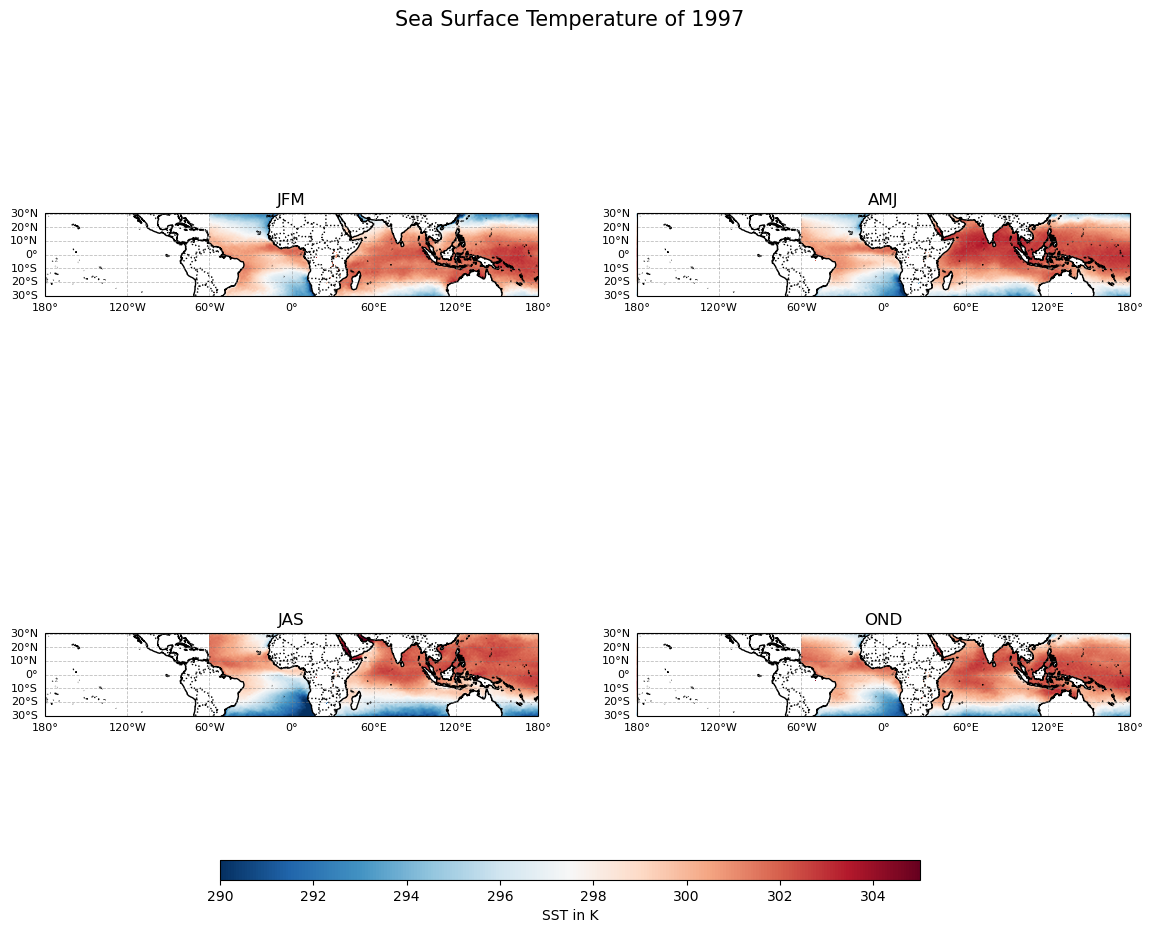

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axes = plt.subplots(
    2, 2, figsize=(14, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

axes = axes.flatten()

for ax, data, title in zip(
    axes,
    [sst_anom_1997_JFM, sst_anom_1997_AMJ, sst_anom_1997_JAS, sst_anom_1997_OND],
    ["JFM", "AMJ", "JAS", "OND"]
):
    pcm = data.plot(
        ax=ax, transform=ccrs.PlateCarree(), cmap="RdBu_r",
        vmin=290, vmax=305, add_colorbar=False
    )
    
    # Coastlines and borders
    ax.coastlines(resolution="50m")
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.set_title(title, fontsize=12)
    
    # ---- LATITUDE & LONGITUDE ----
    gl = ax.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=0.6,
        color='gray',
        alpha=0.5,
        linestyle='--'
    )
    gl.top_labels = False     # Do not label on top
    gl.right_labels = False   # Do not label on right
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

# ---- Shared colorbar ----
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])
fig.colorbar(pcm, cax=cbar_ax, orientation="horizontal", label="SST in K")

plt.suptitle("Sea Surface Temperature of 1997", fontsize=15, y=0.95)

plt.show()

Figures 2. The Seasonal Sea Surface Temperature During the 1997 Very Strong El Nino
In order to visualized what happened during the very strong El Nino in 1997-1998, we plotted the seasonal sea surface temperature of 1997. A very dominant warming ocean had been observed in all the seasons specially during OND Season were the peak of El Nino is within this season. Based on the plot, the area of warming during the 1997 very strong El Nino is within the Pacific Ocean extending to South China Sea and Indian OCean. Most of the area in the tropics felt the warming during this event. During AMJ and JAS, the warming extends to the North due to transition from boreal spring to boreal summer where the tilt and concentration of the solar radiation coming from the sun is in the Northern Hemisphere.

In [31]:
# Computation of Anomaly
sst_anom_JFM = sst_anom_1997_JFM - sst_JFM
sst_anom_AMJ = sst_anom_1997_AMJ - sst_AMJ
sst_anom_JAS = sst_anom_1997_JAS - sst_JAS
sst_anom_OND = sst_anom_1997_OND - sst_OND

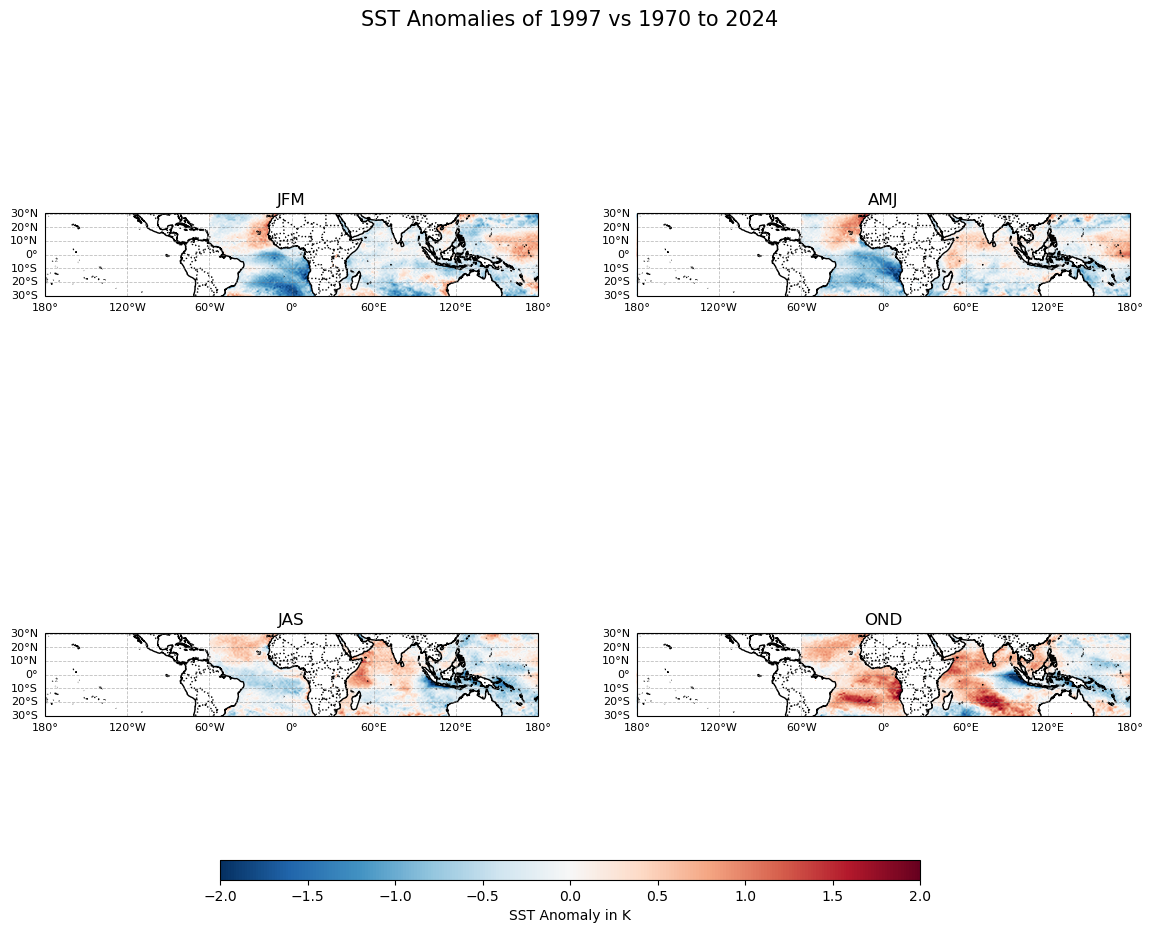

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axes = plt.subplots(
    2, 2, figsize=(14, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

axes = axes.flatten()

for ax, data, title in zip(
    axes,
    [sst_anom_JFM, sst_anom_AMJ, sst_anom_JAS, sst_anom_OND],
    ["JFM", "AMJ", "JAS", "OND"]
):
    pcm = data.plot(
        ax=ax, transform=ccrs.PlateCarree(), cmap="RdBu_r",
        vmin=-2, vmax=2, add_colorbar=False
    )
    
    # Coastlines and borders
    ax.coastlines(resolution="50m")
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.set_title(title, fontsize=12)

    # ---- LATITUDE & LONGITUDE ----
    gl = ax.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=0.6,
        color='gray',
        alpha=0.5,
        linestyle='--'
    )
    gl.top_labels = False     # Do not label on top
    gl.right_labels = False   # Do not label on right
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

# ---- Shared colorbar ----
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])
fig.colorbar(pcm, cax=cbar_ax, orientation="horizontal", label="SST Anomaly in K")

plt.suptitle("SST Anomalies of 1997 vs 1970 to 2024", fontsize=15, y=0.95)

plt.show()

Figures 3. The Sea Surface Temperature Anomaly of 1997 vs 1970 to 2024
In order for us to observed the difference in warming of the 1997 very strong El Nino with the long term average Sea Surface Temperature, we determined the anomaly from the 1997 El Nino to its long term average (1970 to 2024). And based on the plots shown above, mixed signals of warming and cooling can be seen in the different seasons. For JFM, there were areas in the Southern Hemisphere that has a dominant cooling, while there were areas also of warming like in the Eastern Pacific and ares east of North Atlantic. The highest positive anomaly for 1997 El Nino event can be observed during the OND season, where the highest warming can be seen on the Southern Hemisphere at the Indian Ocean and Atlantic Ocean. It is also good to note the consistent warming in the east of North Atlantic at the North Africa, area somewhere in Strait of Gibraltar. It shows a warming anomaly accross all the seasons.

In [38]:
u10 = ds['u10']

In [39]:
u10

<xarray.DataArray 'u10' (valid_time: 1020, latitude: 241, longitude: 961)> Size: 945MB
[236233020 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2024-12-01
  * latitude    (latitude) float64 2kB 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude   (longitude) float64 8kB -60.0 -59.75 -59.5 ... 179.5 179.8 180.0
    expver      (valid_time) <U4 16kB ...
Attributes: (12/32)
    GRIB_paramId:                             165
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      231601
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    long_name:                                10 metre U wind component
    units:                                    m s**-1
    standard_name:                            unknown
    GRIB_surface:                             0.0

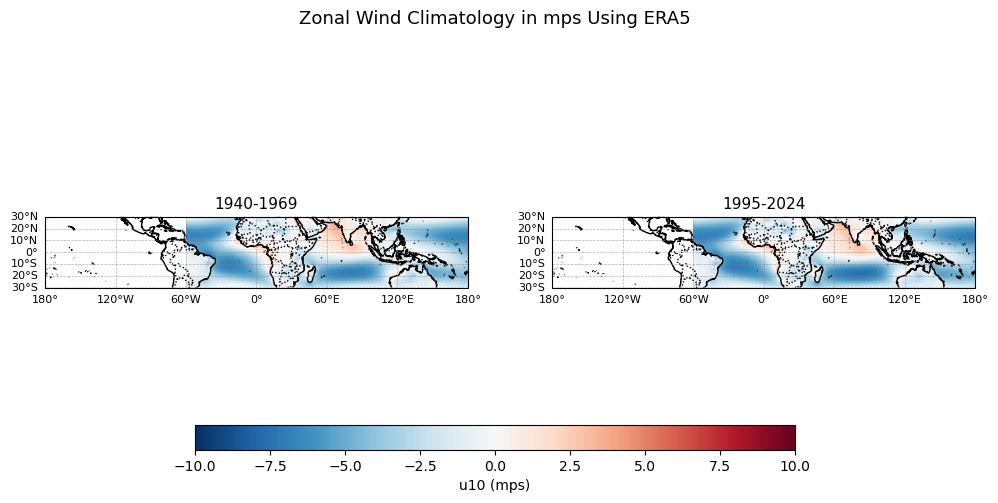

In [40]:
# Comparison of Previous Climate Normal to Latest Climate Normal
u10_clim_1 = u10.sel(valid_time=slice("1940", "1969")).mean(dim="valid_time")
u10_clim_2 = u10.sel(valid_time=slice("1995", "2024")).mean(dim="valid_time")

# Plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axes = plt.subplots(
    1, 2, figsize=(12,5),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

for ax, data, title in zip(
    axes,
    [u10_clim_1, u10_clim_2],
    ["1940-1969", "1995-2024"]
):
    pcm = data.plot(
        ax=ax, transform=ccrs.PlateCarree(), cmap="RdBu_r",
        vmin=-10, vmax=10, add_colorbar=False
    )

    ax.coastlines(resolution="50m")
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.set_title(title, fontsize=11)

    # ---- LATITUDE & LONGITUDE LABELS ----
    gl = ax.gridlines(
        draw_labels=True,
        crs=ccrs.PlateCarree(),
        linewidth=0.5,
        color='gray',
        alpha=0.6,
        linestyle="--"
    )
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

# Shared colorbar
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.05])
fig.colorbar(pcm, cax=cbar_ax, orientation="horizontal", label="u10 (mps)")

plt.suptitle("Zonal Wind Climatology in mps Using ERA5", fontsize=13, y=0.98)

plt.show()

Figures 4. Climatological Zonal Winds of ERA 5
To compare the difference of the first recorded zonal wind climatology with the latest zonal wind climatology, we plotted two extreme dates of zonal wind climatologies. In terms of patterns, the positive and negative zonal winds can be observed at the same locations for both climatologies. It is just in terms of their magnitudes that differs. the latest (right image) climatology tends to have a higher intensity in terms of its magnitude, though the same in directions. Areas between 50E to ~90E on the Northern Hemisphere has a dominant westerly wind flow, while most of the remaining areas has en easterly wind flow. The easterly wind flow in the tropics is due to geographical location for in the lower latitudes, the prevailing wind direction is a northeasterly winds, making the zonal wind to flow in the east. While the westerly in the Bay of Bengal is due to cornering effect of trapped winds in the area. 

In [47]:
# Monthly Climatology for Zonal Winds (will be using the latest ALL years)
u10_monthly_clim_all = ds["u10"].groupby("valid_time.month").mean("valid_time")

# Seasonal Zonal (ALL years)
u10_JFM = u10_monthly_clim_all.sel(month=[1,2,3]).mean("month")
u10_AMJ = u10_monthly_clim_all.sel(month=[4,5,6]).mean("month")
u10_JAS = u10_monthly_clim_all.sel(month=[7,8,9]).mean("month")
u10_OND = u10_monthly_clim_all.sel(month=[10,11,12]).mean("month")

In [48]:
#Seasonal Zonal Winds for 1997
def seasonal_mean(ds, months):
    return ds.sel(valid_time=ds.valid_time.dt.month.isin(months)).mean("valid_time")

u10_1997 = u10.sel(valid_time="1997")

u10_anom_1997_JFM = seasonal_mean(u10_1997, [1,2,3])
u10_anom_1997_AMJ = seasonal_mean(u10_1997, [4,5,6])
u10_anom_1997_JAS = seasonal_mean(u10_1997, [7,8,9])
u10_anom_1997_OND = seasonal_mean(u10_1997, [10,11,12])

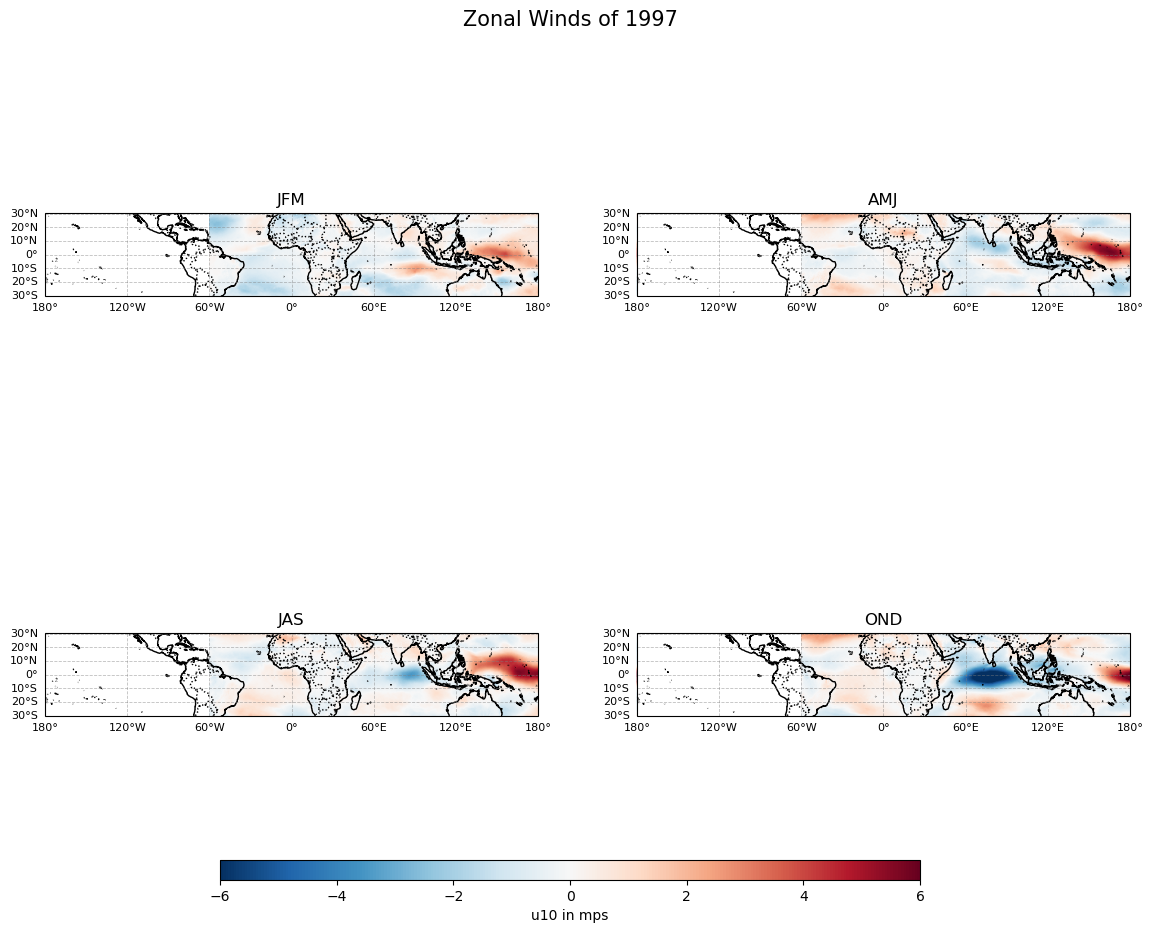

In [50]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axes = plt.subplots(
    2, 2, figsize=(14, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

axes = axes.flatten()

for ax, data, title in zip(
    axes,
    [u10_anom_JFM, u10_anom_AMJ, u10_anom_JAS, u10_anom_OND],
    ["JFM", "AMJ", "JAS", "OND"]
):
    pcm = data.plot(
        ax=ax, transform=ccrs.PlateCarree(), cmap="RdBu_r",
        vmin=-6, vmax=6, add_colorbar=False
    )
    
    # Coastlines and borders
    ax.coastlines(resolution="50m")
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.set_title(title, fontsize=12)

 # ---- LATITUDE & LONGITUDE ----
    gl = ax.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=0.6,
        color='gray',
        alpha=0.5,
        linestyle='--'
    )
    gl.top_labels = False     # Do not label on top
    gl.right_labels = False   # Do not label on right
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

# ---- Shared colorbar ----
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])
fig.colorbar(pcm, cax=cbar_ax, orientation="horizontal", label="u10 in mps")

plt.suptitle("Zonal Winds of 1997", fontsize=15, y=0.95)

plt.show()

Figures 5. The Zonal Winds During the 1997 Very Strong El Nino
In order for us to visualized what happened to the Zonal Winds in different seasons during the 1997 El Nino and determine how does this affect the anomaly in the latter section, we plotted the zonal winds during the 1997 very strong El Nino. When El Nino develops and peaks, some weather parameters and climate varaiables changes (develops, peaks, and decays). And it can be clearly seen here where are the hotspots for strong magnitude of easterly and westerly wind flows. Low magnitudes of wind had been observed and can be seen at JFM season, were the El Nino still developing. Though there is a an easerly wind flows on the east, there are still low signals of westerly winds in the west of the selected domain. For AMJ Season, strong easterly wind flows had been observed in the eastern and central Pacific, a signal of peaking warm phase of ENSO, and this strong easterly wind flow consistently observed until JAS season, and pullsback east during OND season due to developing negative u10 in the Indian Ocean. 

In [45]:
# Computation of Anomaly
u10_anom_JFM = u10_anom_1997_JFM - u10_JFM
u10_anom_AMJ = u10_anom_1997_AMJ - u10_AMJ
u10_anom_JAS = u10_anom_1997_JAS - u10_JAS
u10_anom_OND = u10_anom_1997_OND - u10_OND

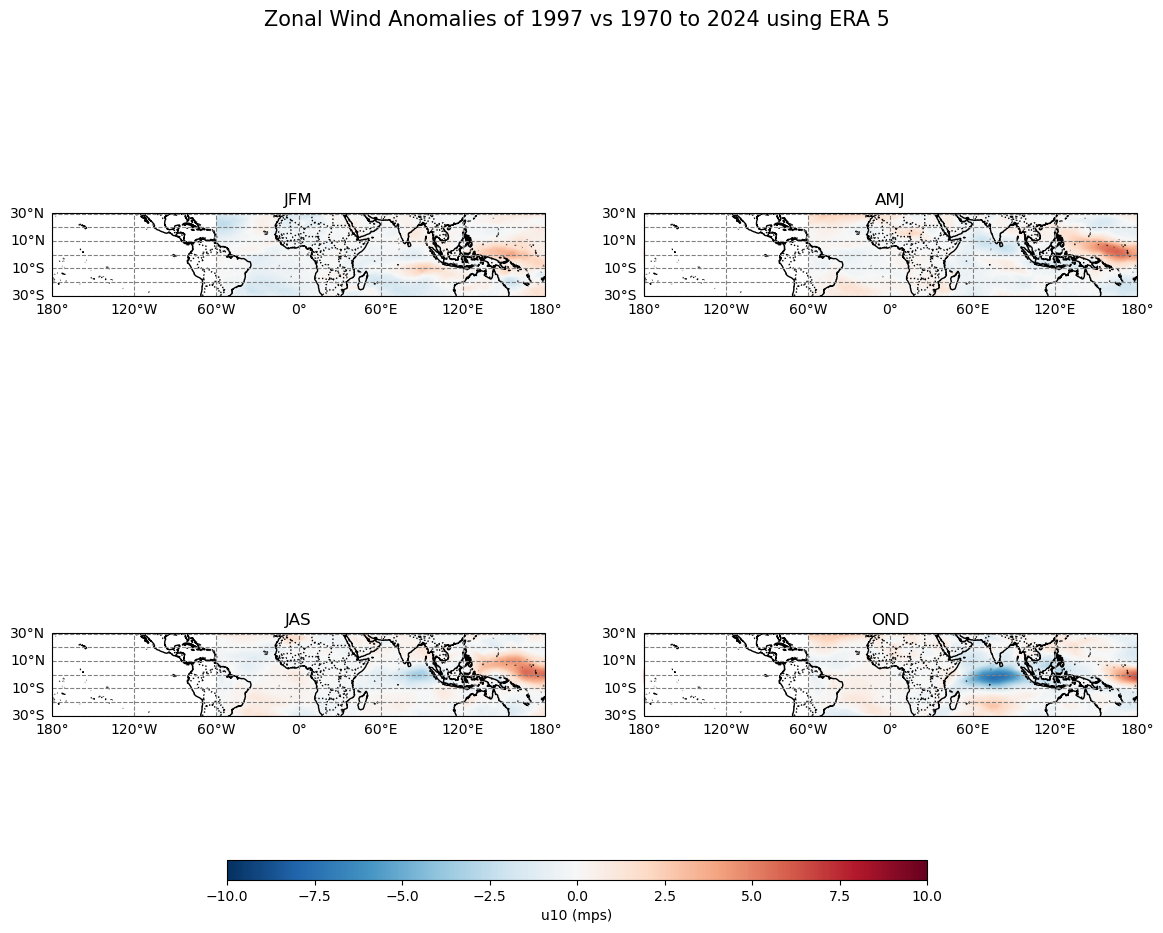

In [46]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axes = plt.subplots(
    2, 2, figsize=(14, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

axes = axes.flatten()  

for ax, data, title in zip(
    axes,
    [u10_anom_JFM, u10_anom_AMJ, u10_anom_JAS, u10_anom_OND],
    ["JFM", "AMJ", "JAS", "OND"]
):
    pcm = data.plot(
        ax=ax, transform=ccrs.PlateCarree(), cmap="RdBu_r",
        vmin=-10, vmax=10, add_colorbar=False
    )

    ax.coastlines(resolution="50m")
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.set_title(title, fontsize=12)

    # 🔹 Add latitude/longitude gridlines
    gl = ax.gridlines(
        draw_labels=True,
        linewidth=0.8, linestyle="--", color="gray"
    )
    gl.top_labels = False   # Turn off top labels
    gl.right_labels = False # Turn off right labels

# ---- Shared colorbar ----
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])
fig.colorbar(pcm, cax=cbar_ax, orientation="horizontal",
             label="u10 (mps)")

plt.suptitle("Zonal Wind Anomalies of 1997 vs 1970 to 2024 using ERA 5", fontsize=15, y=0.95)
plt.show()

Figures 6. The Zonal Wind Anomalies of 1997 vs 1970 to 2024
For us to determine the changes observed in the zonal winds of 1997 very strong El Nino to the average long term (1970 to 2024) zonal winds, we tried to plot the zonal wind anomalies with respect to 1997 event. This will help us to look for different hotspot of strong signals of changes in zonal winds. Based on the plot, the 1997 ENSO event, transcribed in the anomaly plots, and the strongest magnitude of anomaly can be observed during the OND season where the peak of ENSO is observed. This means, that the El Nino in 1997 has very strong effect on the magnitude of zonal winds specially during OND season. A strong westerly wind burst had been captured during the OND season. 

Summary and Conclusion
The researcher downloaded an ERA5 u10 and SST monthly data and processed the data using jupyter lab. Two climatological normal was produces, the 1940 to 1969 and the 1995 to 2024 climatological normal. For the Sea Surface Temperature, the location of warmer SSTs and cooler SSTs were almost the same, the latest (1995 to 2024) climatological normal shows to have a little warmer compared to the old climatological nomral. The same findings had been seen on the study of Samset et al, in 2024, on the warming of the ocean basin. The annually averaged global mean near-surface temperature in 2024 was 1.55 °C ± 0.13 °C above the 1850–1900 average (WMO State of Global Climate, 2024). Moreover, in order to identify hotspots of the 1997 El Nino, the researcher plotted a seasonal SSTs and SST Anomalies of the 1997 El Nino. A thick layer of warming SST in the Pacific was captured indicating the warming of SST due to warm phase of ENSO that started at JAS and peaked (warmest) during the OND Season, that coincides with the study of Zheng et al (2024) that SST amplitude with an enhanced (weakened) amplitude from boreal summer to autumn (winter). Furthemrore, for zonal winds (u10), the same observations had been seen for the two climatological norms, faster (slower) easterly wind flow was observed for the new (old) climatological norm. The capture of the westerly wind burst (WWBs) was one of the highlight of the zonal wind plot, because it was clearly captured during the 1997 ENSO specially during the OND season and can also observed at the zonal wind anomaly plot for OND Season. The oceanic internal response to westerly wind bursts (WWBs) act as a fundamental part of the mechanism of ENSO diversity formation (Shi and Lin 2025). And the intensity of warm phase of ENSO, made it clearly see the WWBs.
Sea surface temperature (SST) is a fundamental geophysical parameter. SST observations are used in climatechange detection (Matthews, 2013). The effect also of ENSO to the zonal winds had been clearly observed in the different plots done. Therefore, outputs like these are helpful in determining for the existence of climate change in our today's era. 

Acknowledgement
The researcher would like to acknowledge and very much appreciate the use of Artificial Intelligence, specifically copilot and chatgpt for debugging and fixing the codes to run the data sets.

References:

Matthews, John Robbin B. “Comparing historical and modern methods of sea surfacetemperature measurement – Part 1: Review of methods,ﬁeld comparisons and dataset adjustments.” Ocean Science, vol. 9, no. 4, 203, pp. 683-694.

State of the Global Climate 2024. Geneva, UN, 2025, https://library.wmo.int/records/item/69455-state-of-the-global-climate-2024. Accessed 10 December 2025.

Yunhao, Shi, and Yunluan Lin. “The Effect of Westerly Wind Bursts on ENSO Diversity: An Oceanic Perspective.” Advancing Earth and Space Science, vol. 130, no. 14, 2025, pp. 1-15.

Zheng, Xiao-Tong, et al. “Advanced Peak Phase of ENSO under Global Warming.” Journal of Climate, vol. 37, no. 20, 2024, pp. 5271-5289.